In [15]:
import os
import h5py
import random
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import(
    Flatten, # flatten layers to convert multi dimensional data into 1d vectors
    Dense,
    Dropout,
    BatchNormalization,

)
from tensorflow.keras.optimizers import Adam
#DATA preparation
from tensorflow.keras.utils import to_categorical

#Loss functn
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

import tensorflow as tf

from sklearn.preprocessing import OneHotEncoder  # Perform one-hot encoding for categorical features

# --- Model Evaluation ---
from sklearn.metrics import (  # Evaluate model performance
   classification_report,  # Generate a detailed classification report
   confusion_matrix  # Visualize model performance with a confusion matrix
)

# --- Visualization ---
import matplotlib.pyplot as plt  # Create plots and visualizations with matplotlib
import seaborn as sns 

## Load THE Data

In [2]:
file_path = r"D:\archive2.5\SVHN_single_grey1.h5"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# ✅ Open and check keys
with h5py.File(file_path, 'r') as svhn_data:
    print("Keys in file:", list(svhn_data.keys()))
    X_train=svhn_data.get('X_train')[:]
    Y_train=svhn_data.get('y_train')[:]
    X_test=svhn_data.get('X_test')[:]
    Y_test=svhn_data.get('y_test')[:]


Keys in file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [3]:
print(X_train.shape[0])
print(X_test.shape[0])


42000
18000


## Visualizing images

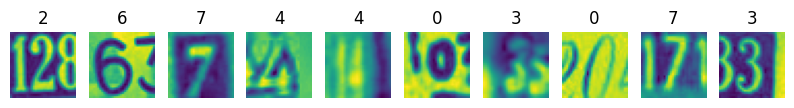

In [4]:
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i])
    plt.title(Y_train[i])
    plt.axis('off')

## Data preparation

In [5]:
print(X_train[0].shape)
print(X_train[0])

(32, 32)
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [6]:
##Normalizing the data && flattening the datasets t
X_train = X_train.reshape(-1, 1024)/255.0
X_test = X_test.reshape(-1, 1024)/255.0

In [7]:
##One hot encoding means - har class ke liye ekk slot yaa index,,,sirf apni class ka index 1 rakho baaki sab ka 0
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

## Building the Model

In [8]:
#fix the seed for random number genrators
np.random.seed(40)
random.seed(40)
tf.random.set_seed(40)

In [9]:
def model1():
    model=Sequential()
    model.add(Dense(64,input_shape=(1024,),activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    return model

NN_model1=model1()
print(NN_model1.summary())

history_NN_model1=NN_model1.fit(X_train, Y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=50)
        
        
    


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50


263/263 [==============================] - 2s 3ms/step - loss: 2.3007 - accuracy: 0.1106 - val_loss: 2.2852 - val_accuracy: 0.1199
Epoch 2/50
263/263 [==============================] - 1s 2ms/step - loss: 2.2196 - accuracy: 0.1672 - val_loss: 2.1103 - val_accurac

## Increasing the hidden layers from 2 to 3

In [19]:
##3 hidden layers
def model2():
    model=Sequential()
    model.add(Dense(128,input_shape=(1024,),activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    return model

NN_model2=model2()
print(NN_model2.summary())

history_NN_model2=NN_model2.fit(X_train, Y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=25)
        
        
    

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               131200    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 141866 (554.16 KB)
Trainable params: 141866 (554.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/25
263/263 [==============================] - 1s 3ms/step - loss: 2.3049 - accuracy: 0.1049 - val_loss: 2.2921 - val_accuracy: 0.1293

## Adding Dropout,Batch Normalisation,

In [14]:
## 5 hidden layer

def model5():
    model=Sequential()
    model.add(Dense(256,input_shape=(1024,),activation='relu'))
    
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    
    model.add(Dense(64,activation='relu'))
    
    model.add(Dense(32,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10,activation='softmax'))
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        metrics=['accuracy']
    )
    return model

NN_model5=model5()
print(NN_model5.summary())

history_NN_model5=NN_model5.fit(X_train, Y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=25)
        
        
    

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               262400    
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)               

In [19]:
test_loss, test_acc = NN_model5.evaluate(X_test, Y_test, verbose=1)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


563/563 [==============================] - 1s 1ms/step - loss: 0.7700 - accuracy: 0.7625
Test loss: 0.7699606418609619
Test accuracy: 0.762499988079071
